<center>
<h1>Introduction to Deep Learning with Keras</h1>
<h3>Tiago Vale</h3>
<h4>Adapted from a tutorial by Michela Paganini</h4>
</center>


This is the first of two notebooks for today's tutorial. You will find the second one <a href="deeplearning_intro.ipynb">here</a>.

## What is Deep Learning?

> <i>Deep learning is a particular kind of machine learning that achieves great power and ﬂexibility by learning to represent the world as a nested hierarchy of concepts, with each concept deﬁned in relation to simpler concepts, and more abstract representations computed in terms of less abstract ones.</i>

<div align="right">
  I. Goodfellow, Y. Bengio, and A. Courville, "Deep Learning", MIT Press, 2016. <br>
  http://www.deeplearningbook.org/
</div>

#### Representation Learning

> <i>Use machine learning to discover not only the mapping from representation to output but also the representation itself. </i>

<div align="right">
  I. Goodfellow, Y. Bengio, and A. Courville, "Deep Learning", MIT Press, 2016. <br>
  http://www.deeplearningbook.org/
</div>

*e.g.*:
* What’s 1753 + 131?
* What’s MMXVII - MCMXCI?

Our goal: 
> Learn a function that maps a set of raw electrical signals from the detector all the way to particle identification

From D. Whiteson:
<img src="./images/dwhiteson.jpg">
Deep learning tackles this by breaking down the task into a series of nested and simpler mappings, which can be described by each different layer of the model.
Deeper nets give us the flexibility to sequentially learn more and more abstract features from iterative non-linear transformations of the input data.
Higher layers of representation amplify aspects of the input that are important for the given task and suppress irrelevant variations.

## Learning Recipe

In parametric, supervised learning:
- **Objective**: in the form of a differentiable loss function, to calculate how far your current prediction is from the target
- **Model**: parametrized by learnable parameters
- **Training strategy**: how to update the parameters
- **Data**: enough to learn from & test your performance

---

## Practical Example

From <a href='http://ippog.web.cern.ch/resources/2012/cms-hep-tutorial'> CMS Software Tutorial</a>, developed by Christian Sander and Alexander Schmidt, and available on <a href='http://opendata.cern.ch/'><img src='./images/opendata.jpg' style="height:70px; display:inline;"></a>.

<img src='./images/ttbar.jpg' style="height:200px;"></a>
The samples come from a $t\bar{t}$ analysis and they are described in a very clear and accessible way in the <a href='http://ippog.web.cern.ch/sites/ippog.web.cern.ch/files/TutorialDocu_3.pdf'>documentation</a>. This was chosen to provide you with a full demo of my typical workflow, going from a `ROOT` file to a fully trained Keras model.

**<i>Disclaimer</i>: my applications won't make 100% physical sense -- please focus on the tools!** 

Before diving into the Deep Learning world, I want to spend a few minutes discussing some **data handling techniques** I use whenever I get started prototyping my applications. 

### NumPy

<a href="http://www.numpy.org/"><img src="images/numpy.jpg"></a>

In [1]:
import numpy as np

In [2]:
np.array([[0,1,2], [0,0,0], [1,2,-1]])  #+1 /2 **2 .ravel() etc.

array([[ 0,  1,  2],
       [ 0,  0,  0],
       [ 1,  2, -1]])

For a nice `numpy` intro, check out the CERN tutorial <a href='https://indico.cern.ch/event/487416/contributions/2174910/attachments/1280846/1902714/LYLWN_present_2016_may_slides.pdf'>Loose your Loops with NumPy</a> (and tons of online material).

<i>Idea:</i> What if those columns represented various branches and every line represented an event/physics object?

### From ROOT to numpy: `root_numpy`

Very easy to turn your `.root` files into Machine Learning compliant inputs using `numpy` and <a href="https://github.com/scikit-hep/root_numpy/tree/4.7.3">`root_numpy`</a>.

Let's take a look at the MC signal sample from our CMS open dataset:

In [1]:
import uproot3
ttbar = uproot3.open('files/ttbar.root')

In [2]:
# -- display your newly created object
ttbar['events'].keys()

[b'NJet',
 b'Jet_Px',
 b'Jet_Py',
 b'Jet_Pz',
 b'Jet_E',
 b'Jet_btag',
 b'Jet_ID',
 b'NMuon',
 b'Muon_Px',
 b'Muon_Py',
 b'Muon_Pz',
 b'Muon_E',
 b'Muon_Charge',
 b'Muon_Iso',
 b'NElectron',
 b'Electron_Px',
 b'Electron_Py',
 b'Electron_Pz',
 b'Electron_E',
 b'Electron_Charge',
 b'Electron_Iso',
 b'NPhoton',
 b'Photon_Px',
 b'Photon_Py',
 b'Photon_Pz',
 b'Photon_E',
 b'Photon_Iso',
 b'MET_px',
 b'MET_py',
 b'MChadronicBottom_px',
 b'MChadronicBottom_py',
 b'MChadronicBottom_pz',
 b'MCleptonicBottom_px',
 b'MCleptonicBottom_py',
 b'MCleptonicBottom_pz',
 b'MChadronicWDecayQuark_px',
 b'MChadronicWDecayQuark_py',
 b'MChadronicWDecayQuark_pz',
 b'MChadronicWDecayQuarkBar_px',
 b'MChadronicWDecayQuarkBar_py',
 b'MChadronicWDecayQuarkBar_pz',
 b'MClepton_px',
 b'MClepton_py',
 b'MClepton_pz',
 b'MCleptonPDGid',
 b'MCneutrino_px',
 b'MCneutrino_py',
 b'MCneutrino_pz',
 b'NPrimaryVertices',
 b'triggerIsoMu24',
 b'EventWeight']

In [6]:
# -- what data type is it?
type(ttbar) 

uproot.rootio.ROOTDirectory

In [7]:
# -- how many events are present?
ttbar['events'].show()

NJet                       (no streamer)              asdtype('>i4')
Jet_Px                     (no streamer)              asjagged(asdtype('>f4'))
Jet_Py                     (no streamer)              asjagged(asdtype('>f4'))
Jet_Pz                     (no streamer)              asjagged(asdtype('>f4'))
Jet_E                      (no streamer)              asjagged(asdtype('>f4'))
Jet_btag                   (no streamer)              asjagged(asdtype('>f4'))
Jet_ID                     (no streamer)              asjagged(asdtype('bool'))
NMuon                      (no streamer)              asdtype('>i4')
Muon_Px                    (no streamer)              asjagged(asdtype('>f4'))
Muon_Py                    (no streamer)              asjagged(asdtype('>f4'))
Muon_Pz                    (no streamer)              asjagged(asdtype('>f4'))
Muon_E                     (no streamer)              asjagged(asdtype('>f4'))
Muon_Charge                (no streamer)              asjagged(asdtype(

In [8]:
ttbar['events'].array('Jet_Px')

<JaggedArray [[14.536326 -22.598843 47.94462] [28.441772 -56.915596 33.166145 -56.35862 44.684635 -7.482028] [-16.001389 -41.807266 29.194143 38.470554] ... [9.455873] [34.382618 -40.78351 38.387394] [1.2887529 54.249912 -54.32023]] at 0x00011442ed50>

## Pandas Dataframes

In [9]:
import pandas as pd

One way of manipulating your data (slicing, filtering, removing variables, creating new features, taking operations of branches) in a simple, visually appealing way is to use <a href="http://pandas.pydata.org/">`pandas`</a> dataframes, a beatiful and efficient Python data structure library. 
Recommended for exploratory data analysis, probably not for high performance applications.

In [10]:
# -- how to turn an ndarray into a pandas dataframe
df = ttbar['events'].pandas.df(["Jet*","Electron*","Muon*","Photon*"],flatten=False)

In [11]:
# -- better way of displaying your data
df.head() # print the first few entries

,Jet_Px,Jet_Py,Jet_Pz,Jet_E,Jet_btag,Jet_ID,Electron_Px,Electron_Py,Electron_Pz,Electron_E,...,Muon_Py,Muon_Pz,Muon_E,Muon_Charge,Muon_Iso,Photon_Px,Photon_Py,Photon_Pz,Photon_E,Photon_Iso
entry,,,,,,,,,,,,,,,,,,,,,
0,"[14.536326, -22.598843, 47.94462]","[81.21743, -57.128605, -11.354554]","[69.88933, 214.73964, 103.36489]","[109.21035, 223.63397, 114.65055]","[2.046098, 2.287386, -1.0]","[True, True, True]",[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1,"[28.441772, -56.915596, 33.166145, -56.35862, ...","[-77.406265, 27.35497, 53.657883, 26.635517, -...","[-249.80095, -83.384865, -35.811634, 32.795723...","[263.24673, 105.52607, 72.99872, 71.04415, 51....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0]","[True, True, True, True, True, True]",[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
2,"[-16.001389, -41.807266, 29.194143, 38.470554]","[-59.66587, 21.09322, -28.674322, 7.8084707]","[-49.965702, -29.628342, 38.021736, -14.963932]","[79.995316, 56.04854, 56.246387, 42.510105]","[-1.0, -1.0, 1.7072395, -1.0]","[True, True, True, True]",[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
3,"[-40.803673, 37.520752]","[34.422157, -35.30761]","[-47.573055, -67.08217]","[72.2569, 85.326126]","[3.6308918, 3.0245562]","[True, True]",[2.1134608],[-51.637726],[-113.057175],[124.30947],...,[12.214735],[-1.1780784],[57.104206],[-1],[5.8823595],[1.3187407],[-44.992695],[-98.81549],[108.58445],[6.15593]
4,"[-67.60135, 70.14259, 27.341812]","[83.323586, -71.90123, 50.182686]","[78.599915, -8.071459, 22.995554]","[135.26254, 101.79264, 62.296364]","[-1.0, -1.0, 3.749933]","[True, True, True]",[-48.963432],[-29.941063],[55.919136],[80.13011],...,[],[],[],[],[],[],[],[],[],[]


In [12]:
# -- ... or the last few
df.tail()

,Jet_Px,Jet_Py,Jet_Pz,Jet_E,Jet_btag,Jet_ID,Electron_Px,Electron_Py,Electron_Pz,Electron_E,...,Muon_Py,Muon_Pz,Muon_E,Muon_Charge,Muon_Iso,Photon_Px,Photon_Py,Photon_Pz,Photon_E,Photon_Iso
entry,,,,,,,,,,,,,,,,,,,,,
36936,"[130.75238, -88.656555, 52.055542, -38.653694]","[-25.403269, 73.82507, -74.26514, -30.641748]","[-120.234634, -287.9017, -124.87855, -128.15019]","[180.0984, 310.71533, 154.60388, 137.42473]","[-1.0, 2.1719244, -1.0, -1.0]","[True, True, True, True]",[],[],[],[],...,[42.071377],[-82.185844],[102.66227],[1],[1.4977853],[],[],[],[],[]
36937,"[103.32671, -76.96731, -1.7732855, -36.428585,...","[28.364288, 19.04971, -52.67511, -36.79929, -3...","[147.43181, 428.39618, 70.97088, 98.63225, 31....","[183.93591, 435.73602, 88.66596, 111.89624, 59...","[1.6103351, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]","[True, True, True, True, True, True, True]",[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
36938,[9.455873],[56.329876],[58.52116],[83.46845],[-1.0],[True],"[123.97549, -41.905777]","[-20.590023, -41.989445]","[25.771751, -1.0412514]","[128.28894, 59.332047]",...,[],[],[],[],[],[122.578766],[-21.208433],[25.54431],[126.99552],[3.7591028]
36939,"[34.382618, -40.78351, 38.387394]","[-36.502987, -6.540353, -3.9363384]","[-39.891785, -50.609142, -69.53584]","[65.95164, 65.821724, 79.77873]","[-1.0, -1.0, -1.0]","[True, True, True]",[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
36940,"[1.2887529, 54.249912, -54.32023]","[-84.01945, -25.615551, -8.034079]","[21.792679, 59.17029, 48.22095]","[87.867546, 84.76728, 73.523155]","[-1.0, -1.0, 3.4573402]","[True, True, True]",[10.356835],[152.02658],[-128.61996],[199.40521],...,[],[],[],[],[],[12.243832],[155.64832],[-131.7291],[204.27644],[3.8334322]


In [13]:
# -- check the shape: it should be [nb_events, nb_variables]
df.shape

(36941, 23)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36941 entries, 0 to 36940
Data columns (total 23 columns):
Jet_Px             36941 non-null object
Jet_Py             36941 non-null object
Jet_Pz             36941 non-null object
Jet_E              36941 non-null object
Jet_btag           36941 non-null object
Jet_ID             36941 non-null object
Electron_Px        36941 non-null object
Electron_Py        36941 non-null object
Electron_Pz        36941 non-null object
Electron_E         36941 non-null object
Electron_Charge    36941 non-null object
Electron_Iso       36941 non-null object
Muon_Px            36941 non-null object
Muon_Py            36941 non-null object
Muon_Pz            36941 non-null object
Muon_E             36941 non-null object
Muon_Charge        36941 non-null object
Muon_Iso           36941 non-null object
Photon_Px          36941 non-null object
Photon_Py          36941 non-null object
Photon_Pz          36941 non-null object
Photon_E           36941 non-n

In [15]:
df.keys() #df.columns

Index(['Jet_Px', 'Jet_Py', 'Jet_Pz', 'Jet_E', 'Jet_btag', 'Jet_ID',
       'Electron_Px', 'Electron_Py', 'Electron_Pz', 'Electron_E',
       'Electron_Charge', 'Electron_Iso', 'Muon_Px', 'Muon_Py', 'Muon_Pz',
       'Muon_E', 'Muon_Charge', 'Muon_Iso', 'Photon_Px', 'Photon_Py',
       'Photon_Pz', 'Photon_E', 'Photon_Iso'],
      dtype='object')

Now, let's create a new dataframe that contains only jet-related branches by slicing our pre-existing ttbar dataframe

In [16]:
# slice the dataframe
jet_df = df[[key for key in df.keys() if key.startswith('Jet')]]
jet_df.head()

,Jet_Px,Jet_Py,Jet_Pz,Jet_E,Jet_btag,Jet_ID
entry,,,,,,
0,"[14.536326, -22.598843, 47.94462]","[81.21743, -57.128605, -11.354554]","[69.88933, 214.73964, 103.36489]","[109.21035, 223.63397, 114.65055]","[2.046098, 2.287386, -1.0]","[True, True, True]"
1,"[28.441772, -56.915596, 33.166145, -56.35862, ...","[-77.406265, 27.35497, 53.657883, 26.635517, -...","[-249.80095, -83.384865, -35.811634, 32.795723...","[263.24673, 105.52607, 72.99872, 71.04415, 51....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0]","[True, True, True, True, True, True]"
2,"[-16.001389, -41.807266, 29.194143, 38.470554]","[-59.66587, 21.09322, -28.674322, 7.8084707]","[-49.965702, -29.628342, 38.021736, -14.963932]","[79.995316, 56.04854, 56.246387, 42.510105]","[-1.0, -1.0, 1.7072395, -1.0]","[True, True, True, True]"
3,"[-40.803673, 37.520752]","[34.422157, -35.30761]","[-47.573055, -67.08217]","[72.2569, 85.326126]","[3.6308918, 3.0245562]","[True, True]"
4,"[-67.60135, 70.14259, 27.341812]","[83.323586, -71.90123, 50.182686]","[78.599915, -8.071459, 22.995554]","[135.26254, 101.79264, 62.296364]","[-1.0, -1.0, 3.749933]","[True, True, True]"


This would be useful if you wanted to classify your events only by using the properties of jets in each event. 

What if your application involved classifying jets, instead of events? In this case, you might want to turn your dataset from event-flat to jet-flat, i.e. a dataframe in which every row represents a jet and every column is a property of this jet. This is extremely easy to do using `pandas` and `numpy`:

In [17]:
def flatten(column):
    '''
    Args:
    -----
        column: a column of a pandas df whose entries are lists (or regular entries -- in which case nothing is done)
                e.g.: my_df['some_variable'] 

    Returns:
    --------    
        flattened out version of the column. 

        For example, it will turn:
        [1791, 2719, 1891]
        [1717, 1, 0, 171, 9181, 537, 12]
        [82, 11]
        ...
        into:
        1791, 2719, 1891, 1717, 1, 0, 171, 9181, 537, 12, 82, 11, ...
    '''
    try:
        return np.array([v for e in column for v in e])
    except (TypeError, ValueError):
        return column

In [18]:
# -- ok, let's try it out!
df_flat = pd.DataFrame({k: flatten(c) for k, c in jet_df.iteritems()})
df_flat.head()

,Jet_Px,Jet_Py,Jet_Pz,Jet_E,Jet_btag,Jet_ID
0,14.536326,81.217430,69.889328,109.210350,2.046098,True
1,-22.598843,-57.128605,214.739639,223.633972,2.287386,True
2,47.944618,-11.354554,103.364891,114.650551,-1.000000,True
3,28.441772,-77.406265,-249.800949,263.246735,-1.000000,True
4,-56.915596,27.354971,-83.384865,105.526070,-1.000000,True


### Plot your data using Matplotlib

Using `pandas` in conjunction with `matplotlib`, you can also inspect your variables super quickly. Check out the following cells for a quick example.

In [19]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


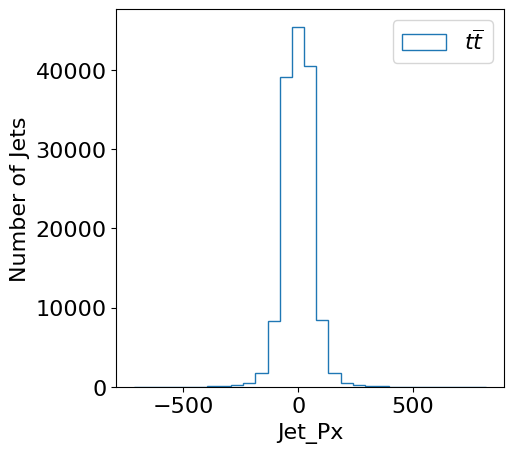

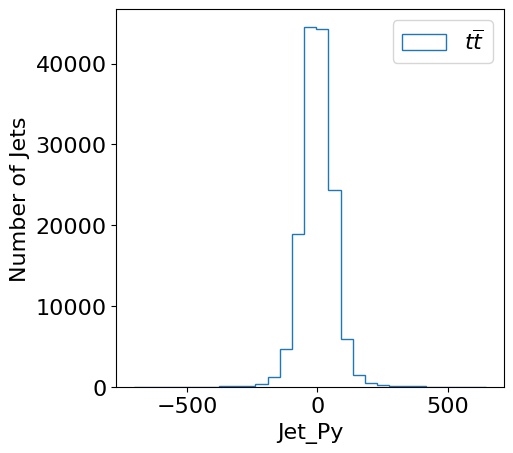

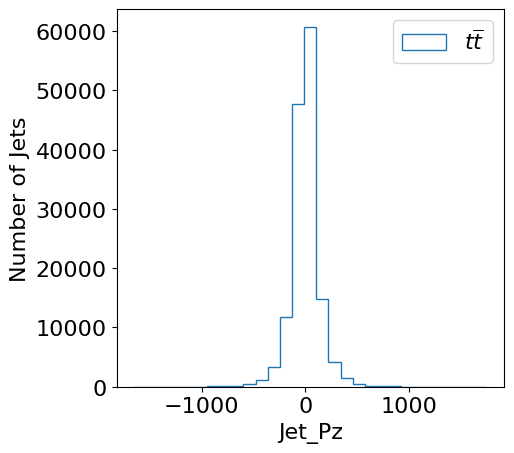

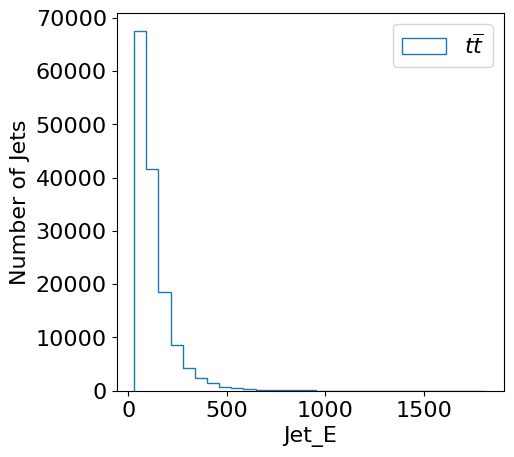

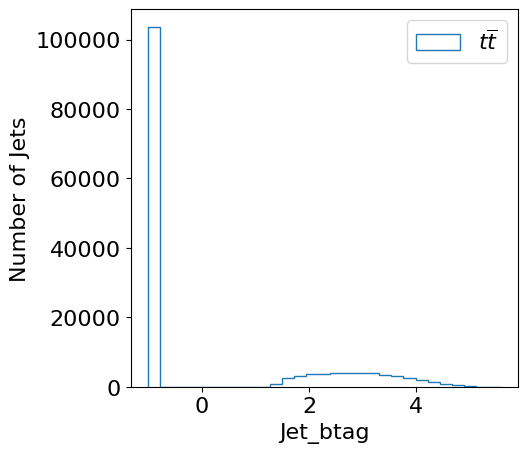

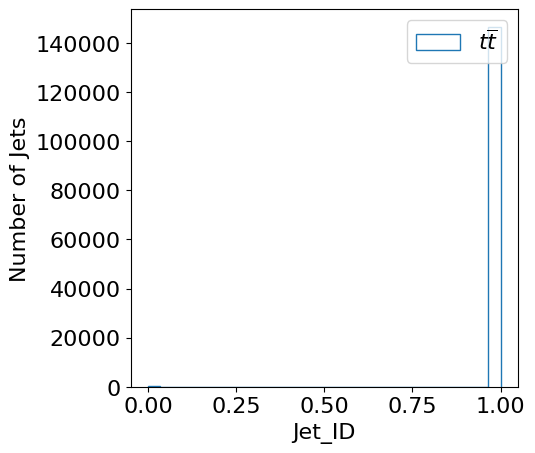

In [20]:
# iterate through the columns
for key in df_flat.keys():
    # plotting settings
    matplotlib.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize=(5, 5), dpi=100)
    bins = np.linspace(min(df_flat[key]), max(df_flat[key]), 30)
    # plot!
    _ = plt.hist(df_flat[key], bins=bins, histtype='step', label=r'$t\overline{t}$')
    # decorate
    plt.xlabel(key)
    plt.ylabel('Number of Jets')
    plt.legend()
    plt.plot()

It's really easy and intuitive to add new columns to a dataframe. You can also define them as functions of other columns. This is great if you need to build your own hand-crafted variables.

In [21]:
df['Jet_P'] = (df['Jet_Px']**2 + df['Jet_Py']**2 + df['Jet_Pz']**2)**(0.5)

In [22]:
# -- again, you can easily slice dataframes by specifying the names of the branches you would like to select 
df[['Jet_P', 'Jet_Px', 'Jet_Py', 'Jet_Pz', 'Jet_E']].head()

,Jet_P,Jet_Px,Jet_Py,Jet_Pz,Jet_E
entry,,,,,
0,"[108.12998, 223.3551, 114.50726]","[14.536326, -22.598843, 47.94462]","[81.21743, -57.128605, -11.354554]","[69.88933, 214.73964, 103.36489]","[109.21035, 223.63397, 114.65055]"
1,"[263.06116, 104.59787, 72.537125, 70.43652, 50...","[28.441772, -56.915596, 33.166145, -56.35862, ...","[-77.406265, 27.35497, 53.657883, 26.635517, -...","[-249.80095, -83.384865, -35.811634, 32.795723...","[263.24673, 105.52607, 72.99872, 71.04415, 51...."
2,"[79.45207, 55.413086, 55.858456, 42.010414]","[-16.001389, -41.807266, 29.194143, 38.470554]","[-59.66587, 21.09322, -28.674322, 7.8084707]","[-49.965702, -29.628342, 38.021736, -14.963932]","[79.995316, 56.04854, 56.246387, 42.510105]"
3,"[71.50539, 84.58399]","[-40.803673, 37.520752]","[34.422157, -35.30761]","[-47.573055, -67.08217]","[72.2569, 85.326126]"
4,"[133.00642, 100.771614, 61.60091]","[-67.60135, 70.14259, 27.341812]","[83.323586, -71.90123, 50.182686]","[78.599915, -8.071459, 22.995554]","[135.26254, 101.79264, 62.296364]"


In [23]:
import uproot_methods

In [24]:
# -- you can also build four vectors and store them in a new column in 1 line of code 
from uproot_methods import TLorentzVector
df['Jet_4V'] = [map(lambda args: TLorentzVector(*args), zip(px, py, pz, e)) for 
                (_, (px, py, pz, e)) in df[['Jet_Px', 'Jet_Py', 'Jet_Pz', 'Jet_E']].iterrows()]

In [25]:
# -- look at the 4-vectors of the jets in the first 5 events
[_ for _ in df['Jet_4V'].head()]

In [26]:
# -- calculate the mass (or any other property) of all the jets in the first event
[jet.mass for jet in df['Jet_4V'][0]]

[15.323401924031147, 11.164929207443834, 5.730252080241989]

There is obviously lots you can do with your data once you turn it into a standard Python object and move away from `ROOT`-specific classes. You can now take advantage of state-of-the-art Data Science and Machine Learning libraries to transform your data, while still recovering the functionalities you're used to.

You can now move on to the <a href="deeplearning_intro.ipynb">second notebook</a>.